/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


Top 5 Association Rules:
  antecedents consequents  antecedent support  consequent support   support  \
0    (B02598)    (B02617)            0.322034            0.881356  0.322034   
1    (B02617)    (B02598)            0.881356            0.322034  0.322034   
2    (B02598)    (B02682)            0.322034            0.711864  0.322034   
3    (B02682)    (B02598)            0.711864            0.322034  0.322034   
4    (B02764)    (B02598)            1.000000            0.322034  0.322034   

   confidence      lift  representativity  leverage  conviction  \
0    1.000000  1.134615               1.0  0.038207         inf   
1    0.365385  1.134615               1.0  0.038207    1.068310   
2    1.000000  1.404762               1.0  0.092789         inf   
3    0.452381  1.404762               1.0  0.092789    1.238025   
4    0.322034  1.000000               1.0  0.000000    1.000000   

   zhangs_metric   jaccard  certainty  kulczynski  
0          0.175  0.365385   1.000000    0.68

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

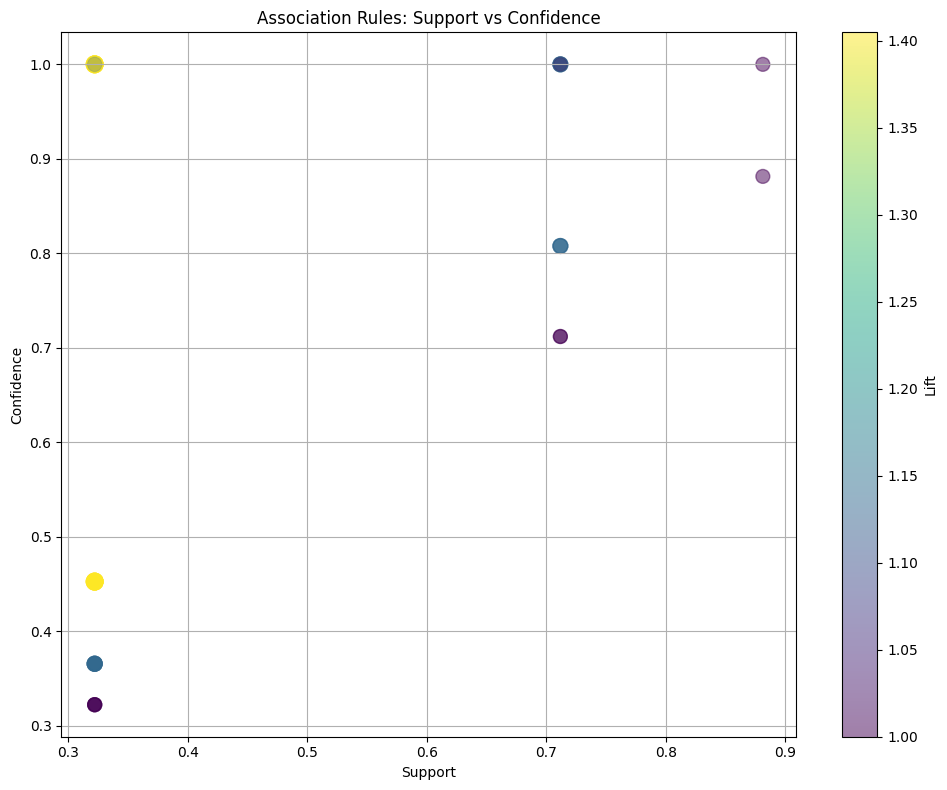

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

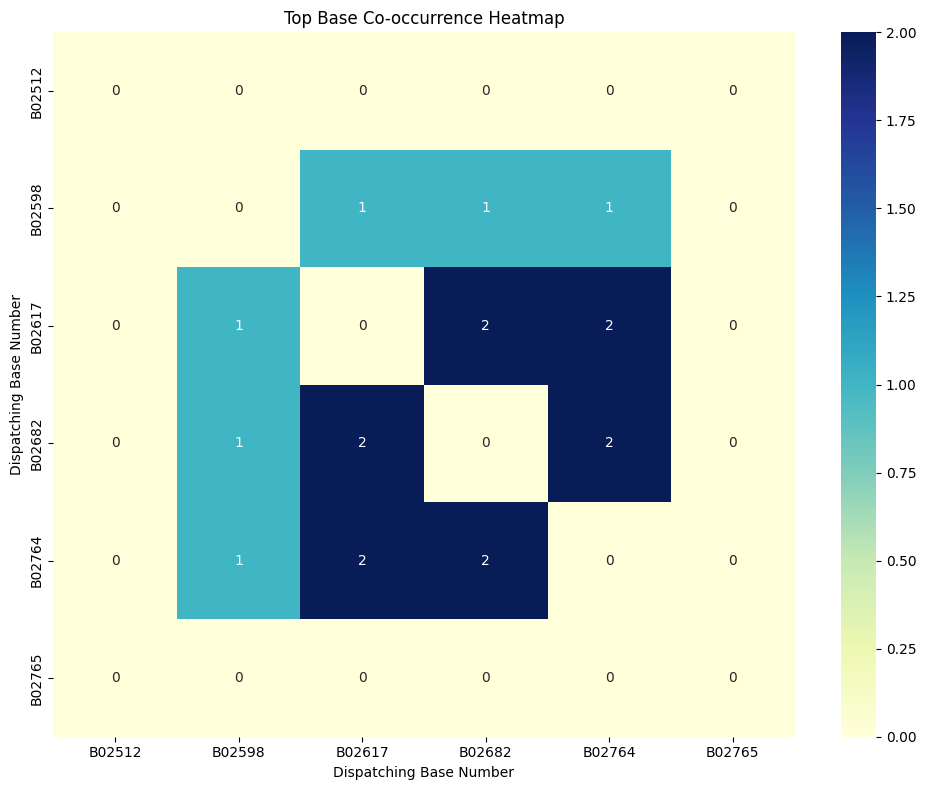

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import Binarizer
import seaborn as sns

# Load the dataset
uber_data = pd.read_csv('/content/Uber-Jan-Feb-FOIL.csv')

# Preprocess Data: Create a pivot table with dispatching_base_number as columns and dates as rows
uber_data['date'] = pd.to_datetime(uber_data['date'])
transaction_data = pd.pivot_table(uber_data, values='trips', index='date', columns='dispatching_base_number', aggfunc='sum', fill_value=0)

# Apply binarization to the data (1 for having trips > threshold, 0 otherwise)
threshold = 10000
binarizer = Binarizer(threshold=threshold)
transaction_data_binarized = binarizer.fit_transform(transaction_data)

# Convert the binarized data back into a DataFrame
transaction_data_binarized_df = pd.DataFrame(transaction_data_binarized, columns=transaction_data.columns, index=transaction_data.index)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transaction_data_binarized_df, min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top 5 association rules
print("Top 5 Association Rules:")
print(rules.head())

# --- Visualization Section (Modified to be similar to your teacher's lab) ---



# Create the scatter plot for the association rules
plt.figure(figsize=(10, 8))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], cmap='viridis', s=rules['lift']*100)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.grid(True)
plt.tight_layout()
plt.show()



# Filter for the top 10 frequent itemsets for a clearer heatmap visualization.
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
top_itemsets_list = [list(fs) for fs in top_itemsets['itemsets']]

# Create a co-occurrence matrix
bases = sorted(transaction_data_binarized_df.columns)
co_occurrence_matrix = pd.DataFrame(0, index=bases, columns=bases)

for itemset in top_itemsets_list:
    for i in range(len(itemset)):
        for j in range(i + 1, len(itemset)):
            base1 = itemset[i]
            base2 = itemset[j]
            co_occurrence_matrix.loc[base1, base2] += 1
            co_occurrence_matrix.loc[base2, base1] += 1

# Create the heatmap for co-occurrence
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top Base Co-occurrence Heatmap')
plt.xlabel('Dispatching Base Number')
plt.ylabel('Dispatching Base Number')
plt.tight_layout()
plt.show()
